# The Impact of Music Listening Habits on Academic Performance and Stress Levels
*Ninerlytics*
INFO 3237-090  
Brielle Boling, Joe Flucus, Keon Herring, Jaden Smith, and Hannah Wood  

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Loading student performance dataset

In [ ]:
# Loading / accessing student performance dataset
%cd /content/drive/MyDrive/"BA_Project"

studentperformance = pd.read_csv('Students_Grading_Dataset.csv')
studentperformance.info()
studentperformance

/content/drive/MyDrive/BA_Project
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13 

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


In [ ]:
# Removal of unnecessary columns for student performance dataset
studentperformance = studentperformance.drop(columns=['Parent_Education_Level', 'Family_Income_Level', 'Internet_Access_at_Home'])

In [ ]:
# Check for missing values in student performance dataset
studentperformance.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),516
Midterm_Score,0
Final_Score,0


In [ ]:
# Fixing missing values (used median for numerical values and mode for categorical)
studentperformance['Attendance (%)'] = studentperformance['Attendance (%)'].fillna(studentperformance['Attendance (%)'].median())
studentperformance['Assignments_Avg'] = studentperformance['Assignments_Avg'].fillna(studentperformance['Assignments_Avg'].median())
# Verifying all missing values have been handled
studentperformance.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


### Loading music and mental health dataset

In [ ]:
%cd /content/drive/MyDrive/"BA_Project"

#Load music and mental health survey dataset
musicmentalhealth = pd.read_csv("mxmh_survey_results.csv")
musicmentalhealth.info()
musicmentalhealth

/content/drive/MyDrive/BA_Project
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [ ]:
# Removal of unnecessary columns from music and mental health dataset
print(musicmentalhealth.columns)
musicmentalhealth = musicmentalhealth.drop(columns=['Timestamp', 'Primary streaming service', 'Instrumentalist', 'Composer', 'Exploratory', 'Permissions'], axis=1)

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')


In [ ]:
# Missing values for music and mental health dataset survey
musicmentalhealth.isnull().sum()

,0
Age,1
Hours per day,0
While working,3
Fav genre,0
Foreign languages,4
BPM,107
Frequency [Classical],0
Frequency [Country],0
Frequency [EDM],0
Frequency [Folk],0


In [ ]:
# Fixing missing values (used median for numerical values and mode for categorical)
musicmentalhealth['Age'] = musicmentalhealth['Age'].fillna(musicmentalhealth['Age'].median())
musicmentalhealth['BPM'] = musicmentalhealth['BPM'].fillna(musicmentalhealth['BPM'].median())
musicmentalhealth['While working'] = musicmentalhealth['While working'].fillna(musicmentalhealth['While working'].mode()[0])
musicmentalhealth['Foreign languages'] = musicmentalhealth['Foreign languages'].fillna(musicmentalhealth['Foreign languages'].mode()[0])
musicmentalhealth['Music effects'] = musicmentalhealth['Music effects'].fillna(musicmentalhealth['Music effects'].mode()[0])
# Verifying missing values have been handled
musicmentalhealth.isnull().sum()

,0
Age,0
Hours per day,0
While working,0
Fav genre,0
Foreign languages,0
BPM,0
Frequency [Classical],0
Frequency [Country],0
Frequency [EDM],0
Frequency [Folk],0


# Exploration of Merged Dataset

In [ ]:
# Column names of both datasets
print("Student Performance Data Columns:", studentperformance.columns.tolist())
print("Music Mental Health Data Columns:", musicmentalhealth.columns.tolist())

Student Performance Data Columns: ['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week', 'Extracurricular_Activities', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
Music Mental Health Data Columns: ['Age', 'Hours per day', 'While working', 'Fav genre', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects']


In [ ]:
# Merge the music dataset with the student performance dataset
MergedData = pd.merge(studentperformance, musicmentalhealth, left_index=True, right_index=True, how='inner')

# Convert to CSV
MergedData.to_csv('MergedData.csv', index=False)
MergedData

,Student_ID,First_Name,Last_Name,Email,Gender,Age_x,Department,Attendance (%),Midterm_Score,Final_Score,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,S1731,Ali,Smith,student731@university.com,Female,21,Business,73.56,50.27,88.66,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,S1732,Ali,Jones,student732@university.com,Female,24,Engineering,58.14,94.81,70.11,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,S1733,Liam,Williams,student733@university.com,Female,18,Mathematics,60.10,80.90,81.91,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,S1734,Sara,Davis,student734@university.com,Male,21,Engineering,94.48,81.95,67.17,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


In [ ]:
# Merged dataset columns
MergedData.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age_x',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Age_y', 'Hours per day', 'While working',
       'Fav genre', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

### Cleaning the merged dataset

In [ ]:
# Filter rows where 'Age_x' (student performance dataset) and 'Age_y' (music and mental health dataset) are both between 18 and 25 inclusive
MergedData = MergedData[
    (MergedData['Age_x'] >= 18) & (MergedData['Age_x'] <= 25) &
    (MergedData['Age_y'] >= 18) & (MergedData['Age_y'] <= 25)
]

In [ ]:
# Removal of unnecessary columns
MergedData = MergedData.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Gender', 'Email'], axis=1)

In [ ]:
# Handling duplicates
MergedData = MergedData.drop_duplicates()
MergedData

,Age_x,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,22,Engineering,52.290,55.03,57.82,84.22,74.06,3.99,85.90,56.09,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve
2,24,Business,57.190,67.05,93.68,67.70,85.70,5.05,73.79,70.30,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
4,23,CS,54.180,46.59,78.89,96.85,83.70,5.97,68.42,66.13,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,21,Engineering,75.725,78.85,43.53,71.40,52.20,6.38,67.29,62.08,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,24,Business,57.600,66.26,89.07,84.52,98.40,2.30,93.65,83.21,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,22,Engineering,98.610,94.47,52.59,90.60,55.58,5.06,88.05,95.02,...,Very frequently,Sometimes,Sometimes,Very frequently,Never,6.0,2.0,2.0,0.0,Improve
730,23,Business,98.910,74.94,53.98,65.76,54.43,8.84,73.00,51.58,...,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,7.0,6.0,4.0,6.0,Improve
732,24,Engineering,58.140,94.81,70.11,74.69,82.52,7.51,81.70,50.23,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,18,Mathematics,60.100,80.90,81.91,93.14,58.10,6.97,73.46,74.62,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve


In [ ]:
# Check for nulls - ensuring no missing vlaues in merged dataset once we joined
MergedData.isnull().sum()

,0
Age_x,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0
Assignments_Avg,0
Quizzes_Avg,0
Participation_Score,0
Projects_Score,0
Total_Score,0


,0
Age_x,-0.212143
Attendance (%),-0.040727
Midterm_Score,-0.085215
Final_Score,-0.014765
Assignments_Avg,0.053320
Quizzes_Avg,0.164454
Participation_Score,-0.008240
Projects_Score,0.000159
Total_Score,-0.177832
Study_Hours_per_Week,-0.058780


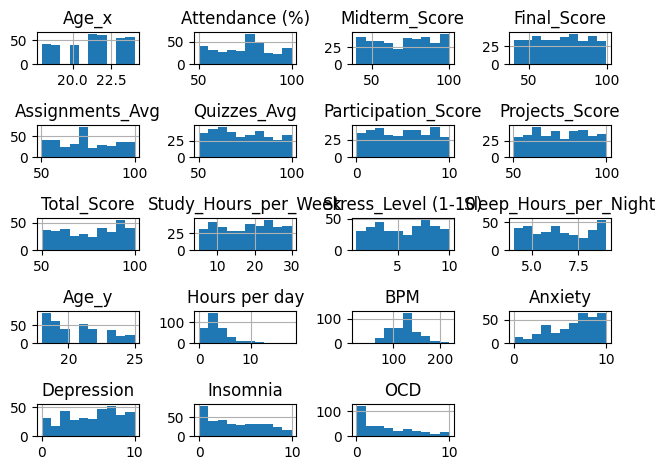

In [ ]:
# Distribution of merged data
MergedData.hist()
plt.tight_layout()
MergedData.select_dtypes(include=['number']).skew()

In [ ]:
# Quick stats on merged data
MergedData.describe()

,Age_x,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night,Age_y,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,21.277311,74.631989,70.637871,69.899580,74.399048,73.462437,4.966022,75.184594,76.336555,17.854902,5.616246,6.450140,20.563025,3.555462,120.731092,6.019608,5.016807,3.509804,2.686275
std,1.936888,13.765966,17.997154,17.023222,14.218424,14.347400,2.880208,14.255326,15.216695,7.273228,2.890524,1.547626,2.185134,2.648564,29.603854,2.698763,2.917354,2.946725,2.865360
min,18.000000,50.010000,40.000000,40.010000,50.230000,50.060000,0.020000,50.090000,50.030000,5.100000,1.000000,4.000000,18.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,63.470000,54.240000,55.080000,62.380000,61.070000,2.500000,63.390000,62.420000,11.300000,3.000000,5.000000,19.000000,2.000000,100.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,75.725000,71.960000,70.140000,74.810000,71.760000,5.050000,74.540000,77.820000,18.400000,6.000000,6.400000,20.000000,3.000000,120.000000,7.000000,5.000000,3.000000,2.000000
75%,23.000000,84.110000,85.970000,84.150000,86.180000,85.030000,7.600000,87.480000,90.320000,24.000000,8.000000,8.000000,22.000000,5.000000,138.000000,8.000000,7.000000,6.000000,5.000000
max,24.000000,99.930000,99.980000,99.650000,99.930000,99.950000,10.000000,99.890000,99.990000,30.000000,10.000000,9.000000,25.000000,18.000000,220.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# Merged Dataset Column Names
MergedData.columns

Index(['Age_x', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Age_y', 'Hours per day', 'While working',
       'Fav genre', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')

# Exploring the data

### **Genre vs Stress Levels**

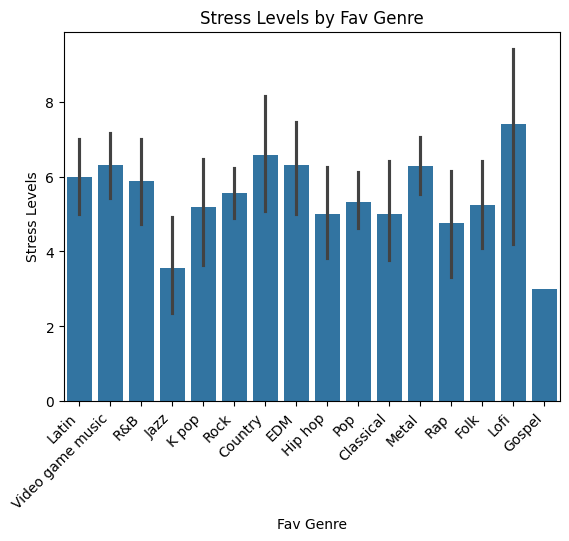

In [ ]:
# Fav Genre vs Stress Levels
sns.barplot(x='Fav genre', y='Stress_Level (1-10)', data=MergedData, estimator='mean')
plt.title('Stress Levels by Fav Genre')
plt.xlabel('Fav Genre')
plt.ylabel('Stress Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Correlation between music habits and Stress Level
mental_health_vars = ['Stress_Level (1-10)']
for var in mental_health_vars:
    if var in musicmentalhealth.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Fav genre', y=var, data=musicmentalhealth)
        plt.xticks(rotation=45)
        plt.title(f'Music Genre vs {var}')
        plt.show()

### **Genre vs STUDENT PERFORMANCE exploratory**

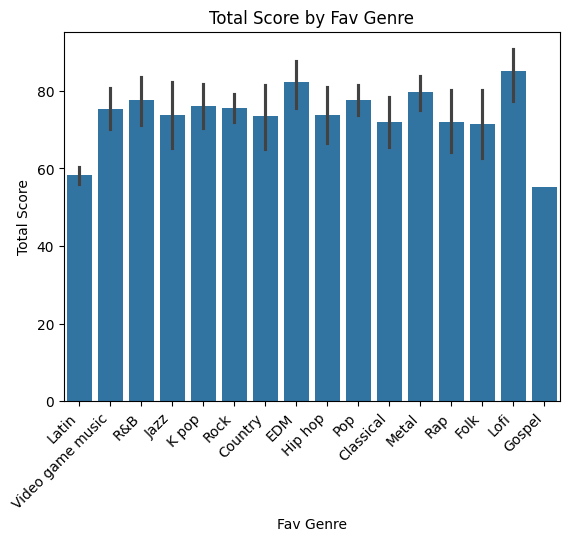

In [ ]:
# Fav Genre vs Total Score
sns.barplot(x='Fav genre', y='Total_Score', data=MergedData, estimator='mean')
plt.title('Total Score by Fav Genre')
plt.xlabel('Fav Genre')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.show()

### Fav Genre vs Study Hours per Week Bar Plot

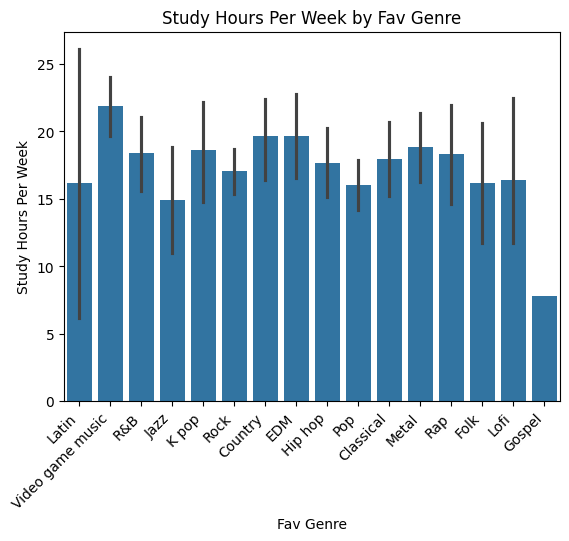

In [ ]:
# Fav Genre vs Study Hours per Week
sns.barplot(x='Fav genre', y='Study_Hours_per_Week', data=MergedData, estimator='mean')
plt.title('Study Hours Per Week by Fav Genre')
plt.xlabel('Fav Genre')
plt.ylabel('Study Hours Per Week')
plt.xticks(rotation=45, ha='right')
plt.show()

### Fav Genre vs Attendance Bar Plot

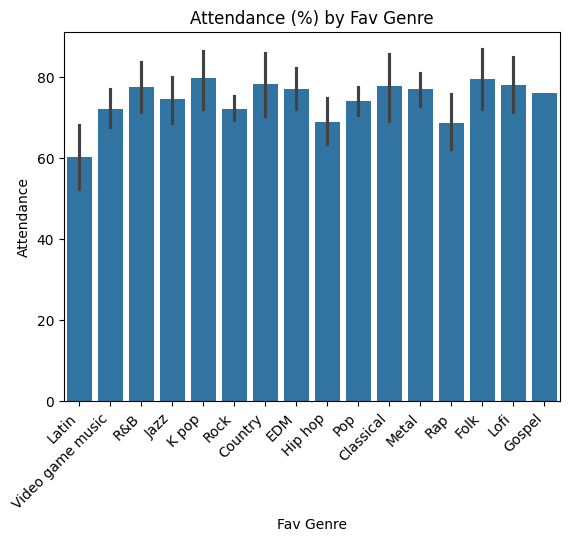

In [ ]:
# Fav Genre vs Attendance (%)
sns.barplot(x='Fav genre', y='Attendance (%)', data=MergedData, estimator='mean')
plt.title('Attendance (%) by Fav Genre')
plt.xlabel('Fav Genre')
plt.ylabel('Attendance')
plt.xticks(rotation=45, ha='right')
plt.show()

Listening Hours per Day vs. Stress Levels Bar Plot

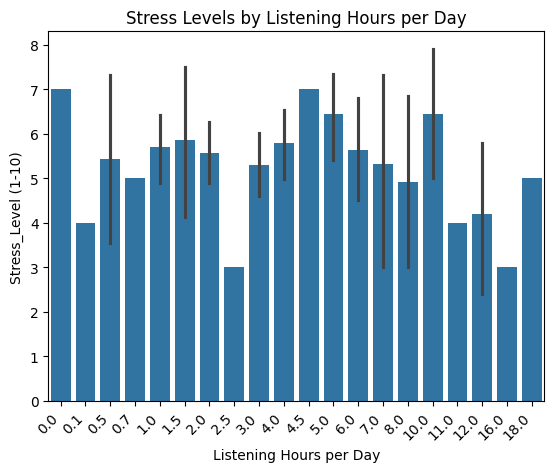

In [ ]:
# Listening Hours per Day vs Stress Levels
sns.barplot(x='Hours per day', y='Stress_Level (1-10)', data=MergedData, estimator='mean')
plt.title('Stress Levels by Listening Hours per Day')
plt.xlabel('Listening Hours per Day')
plt.xticks(rotation=45, ha='right')
plt.show()

Listening Hours per day vs Total Score Bar Plot

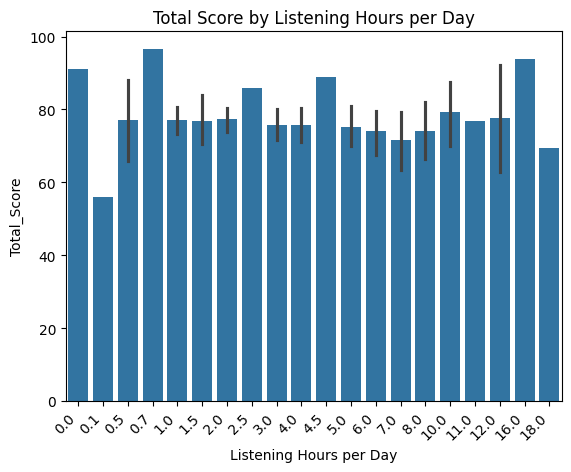

In [ ]:
# Listening Hours per Day vs Total Score
sns.barplot(x='Hours per day', y='Total_Score', data=MergedData, estimator='mean')
plt.title('Total Score by Listening Hours per Day')
plt.xlabel('Listening Hours per Day')
plt.xticks(rotation=45, ha='right')
plt.show()


BPM vs Total Score Bar Plot

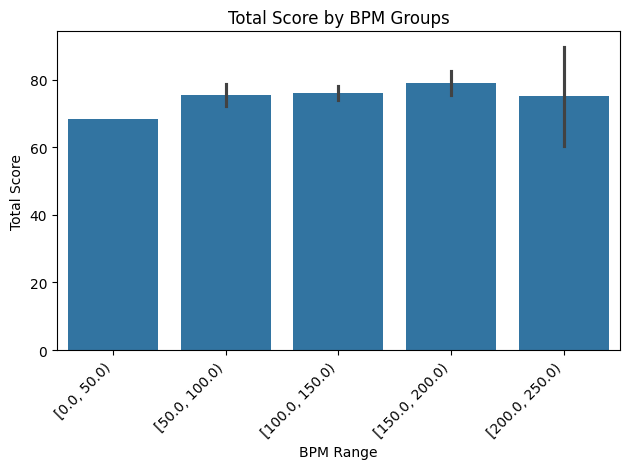

In [ ]:
# Bar plot of Total Score by BPM Groups
# Create BPM bins
bins = np.arange(0, MergedData['BPM'].max() + 50, 50)
MergedData['BPM_Group'] = pd.cut(MergedData['BPM'], bins=bins, right=False)
sns.barplot(x='BPM_Group', y='Total_Score', data=MergedData, estimator='mean')
plt.title('Total Score by BPM Groups')
plt.xlabel('BPM Range')
plt.ylabel('Total Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

BPM vs. Stress Levels Bar Plot

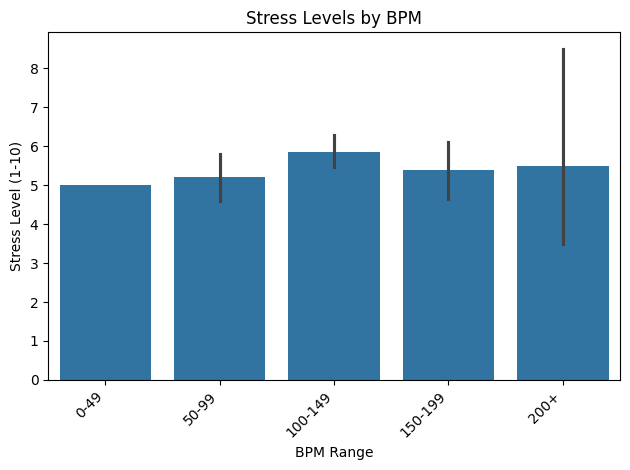

In [ ]:
# BPM vs Stress Levels
# Create BPM bins and labels
bins = [0, 50, 100, 150, 200, float('inf')]  # float('inf') to capture all values above 200
labels = ['0-49', '50-99', '100-149', '150-199', '200+']

# Create a new column for BPM groups
MergedData['BPM_Group'] = pd.cut(MergedData['BPM'], bins=bins, labels=labels, right=False)
sns.barplot(x='BPM_Group', y='Stress_Level (1-10)', data=MergedData, estimator='mean')
plt.title('Stress Levels by BPM')
plt.xlabel('BPM Range')
plt.ylabel('Stress Level (1-10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Favorite music genre preference by Departments

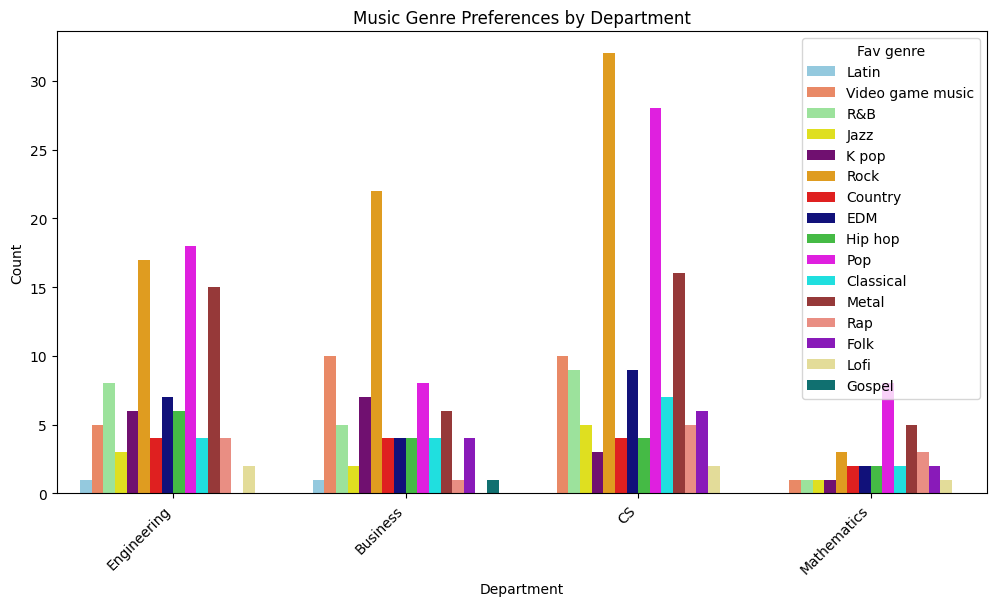

In [ ]:
# Music genre preferences based on their department
custom_palette = ['skyblue', 'coral', 'lightgreen', 'yellow', 'purple', 'orange', 'red',
                   'darkblue', 'limegreen', 'magenta', 'cyan', 'brown', 'salmon',
                   'darkviolet', 'khaki', 'teal']
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Fav genre', data=MergedData, palette=custom_palette)
plt.title('Music Genre Preferences by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


Total Score by Department and Hours Per Day

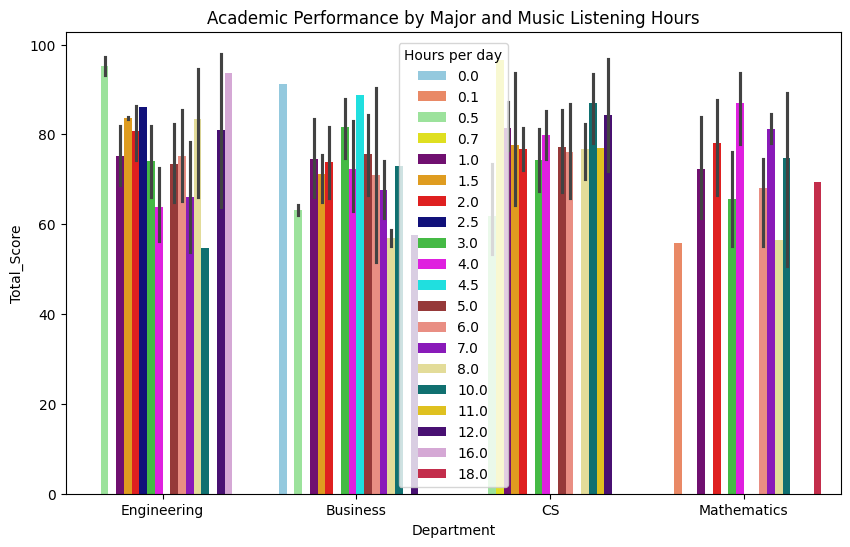

In [ ]:
# Comparing Total_Score (Academic Performance) by Department and a Music Habit (e.g., Hours per day)
custom_palette = [
    "skyblue", "coral", "lightgreen", "yellow", "purple", "orange", "red",
    "darkblue", "limegreen", "magenta", "cyan", "brown", "salmon",
    "darkviolet", "khaki", "teal", "gold", "indigo", "plum", "crimson"
]
plt.figure(figsize=(10, 6))
sns.barplot(x="Department", y="Total_Score", hue="Hours per day", data=MergedData, palette=custom_palette)
plt.title("Academic Performance by Major and Music Listening Hours")
plt.show()

Stress Levels by Department and Fav Genre

<ipython-input-32-17f1ef2421fc>:3: UserWarning: The palette list has more values (20) than needed (16), which may not be intended.
  sns.barplot(x="Department", y="Stress_Level (1-10)", hue="Fav genre", data=MergedData, palette=custom_palette)


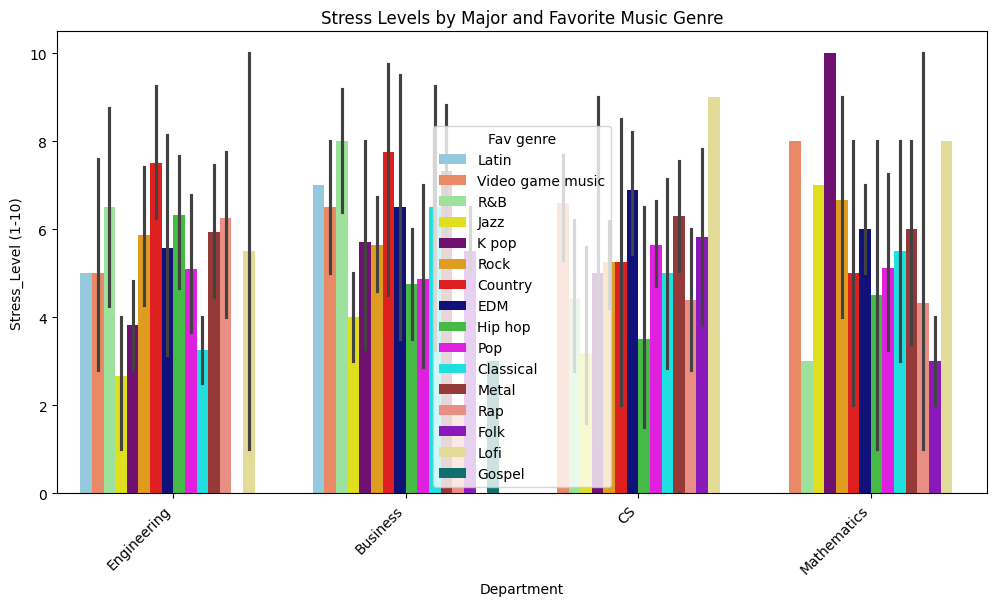

In [ ]:
# Comparing Stress_Level (1-10) by Department and a Music Habit (e.g., Fav genre)
plt.figure(figsize=(12, 6))
sns.barplot(x="Department", y="Stress_Level (1-10)", hue="Fav genre", data=MergedData, palette=custom_palette)
plt.title("Stress Levels by Major and Favorite Music Genre")
plt.xticks(rotation=45, ha='right')
plt.show()

# Normalizing the dataset

,0
Age_x,-0.212143
Attendance (%),-0.040727
Midterm_Score,-0.085215
Final_Score,-0.014765
Assignments_Avg,0.053320
Quizzes_Avg,0.164454
Participation_Score,-0.008240
Projects_Score,0.000159
Total_Score,-0.177832
Study_Hours_per_Week,-0.058780


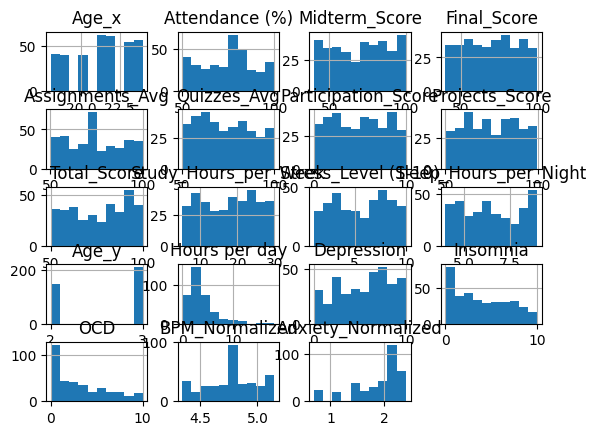

In [ ]:
# Normalizing

MergedData['BPM_Winsorized'] = winsorize(MergedData['BPM'], limits=[0.05, 0.05])  # Caps extreme 5% of values
MergedData['BPM_Winsorized_Log'] = np.log1p(MergedData['BPM_Winsorized'])

MergedData['AgeY_Winsorized'] = winsorize(MergedData['Age_y'], limits=[0.05, 0.05])  # Caps extreme 5% of values
MergedData['AgeY_Winsorized_Log'] = np.log1p(MergedData['AgeY_Winsorized'])

MergedData['Anxiety_Winsorized'] = winsorize(MergedData['Anxiety'], limits=[0.05, 0.05])  # Caps extreme 5% of values
MergedData['Anxiety_Winsorized_Log'] = np.log1p(MergedData['Anxiety_Winsorized'])

# Drop BPM and update
MergedData = MergedData.drop(columns=['BPM'])
MergedData['BPM_Normalized'] = MergedData['BPM_Winsorized_Log']
MergedData = MergedData.drop(columns=['BPM_Winsorized', 'BPM_Winsorized_Log'])

# Drop age and update
MergedData['Age_y'] = MergedData['AgeY_Winsorized_Log']
MergedData = MergedData.drop(columns=['AgeY_Winsorized', 'AgeY_Winsorized_Log'])
MergedData['Age_y'] = MergedData['Age_y'].astype(int)

# Drop anxiety and update
MergedData = MergedData.drop(columns=['Anxiety'])
MergedData['Anxiety_Normalized'] = MergedData['Anxiety_Winsorized_Log']
MergedData = MergedData.drop(columns=['Anxiety_Winsorized', 'Anxiety_Winsorized_Log'])

MergedData.hist()
MergedData.select_dtypes(include=['number']).skew()

# **Cluster Analysis**

In [ ]:
# Define the frequency mapping
frequency_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Very frequently': 3
}

# List of the relevant column names
frequency_columns = [
    'Frequency [Classical]',
    'Frequency [Country]',
    'Frequency [EDM]',
    'Frequency [Folk]',
    'Frequency [Gospel]',
    'Frequency [Hip hop]',
    'Frequency [Jazz]',
    'Frequency [K pop]',
    'Frequency [Latin]',
    'Frequency [Lofi]',
    'Frequency [Metal]',
    'Frequency [Pop]',
    'Frequency [R&B]',
    'Frequency [Rap]',
    'Frequency [Rock]',
    'Frequency [Video game music]'
]

# Iterate through each column and apply the mapping to newSamples instead of MergedData
for col in frequency_columns:
    MergedData[col + '_Numeric'] = MergedData[col].map(frequency_mapping) # Changed MergedData to newSamples

In [ ]:
# Select only numerical features for scaling
numerical_features = MergedData.select_dtypes(include=np.number).columns[0:56]  # Assuming columns 1:14 contain numerical features, adjust if needed

# Apply StandardScaler to numerical features only
scaler = StandardScaler()
df = scaler.fit_transform(MergedData[numerical_features])

print(df.shape)
# Use numerical_features for the columns of MyScaledData instead of MergedData.columns
MyScaledData = pd.DataFrame(df, columns=numerical_features)

(357, 35)


In [ ]:
# K-means
kmeans = KMeans(n_clusters = 4, n_init = 25, random_state = 0)
kmeans.fit(MyScaledData)

# Save cluster labels to the scaled DataFrame
MyScaledData['Cluster'] = kmeans.labels_
# Select the columns used for clustering (exclude 'Cluster')
cluster_columns = MyScaledData.columns[MyScaledData.columns != 'Cluster']

# Create the DataFrame with the correct columns
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=cluster_columns)

In [ ]:
# K-means
selected_columns = [
    'Frequency [Classical]_Numeric',
    'Frequency [Country]_Numeric',
    'Frequency [EDM]_Numeric',
    'Frequency [Folk]_Numeric',
    'Frequency [Gospel]_Numeric',
    'Frequency [Hip hop]_Numeric',
    'Frequency [Jazz]_Numeric',
    'Frequency [K pop]_Numeric',
    'Frequency [Latin]_Numeric',
    'Frequency [Lofi]_Numeric',
    'Frequency [Metal]_Numeric',
    'Frequency [Pop]_Numeric',
    'Frequency [R&B]_Numeric',
    'Frequency [Rap]_Numeric',
    'Frequency [Rock]_Numeric',
    'Frequency [Video game music]_Numeric',
    'Stress_Level (1-10)',
    'Total_Score'
]

# Select the data for clustering based on selected_columns
data_for_clustering = MyScaledData[selected_columns]

# Fit KMeans on the selected data
kmeans = KMeans(n_clusters=4, n_init=25, random_state=0)
kmeans.fit(data_for_clustering)

# Save cluster labels
MyScaledData['Cluster'] = kmeans.labels_

# Create the DataFrame with the correct columns
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=selected_columns)
print(cluster_centers)

   Frequency [Classical]_Numeric  Frequency [Country]_Numeric  \
0                       0.453024                     0.452106   
1                       0.428053                    -0.416885   
2                      -0.400964                     0.115358   
3                      -0.353889                    -0.327510   

   Frequency [EDM]_Numeric  Frequency [Folk]_Numeric  \
0                 0.366181                  0.723590   
1                -0.185643                 -0.574489   
2                -0.381214                  0.215414   
3                 0.100235                 -0.611738   

   Frequency [Gospel]_Numeric  Frequency [Hip hop]_Numeric  \
0                    0.477555                     0.478584   
1                   -0.077338                    -0.894939   
2                   -0.340311                    -0.643773   
3                   -0.123887                     0.678118   

   Frequency [Jazz]_Numeric  Frequency [K pop]_Numeric  \
0                  0.743

### Resampling

In [ ]:
newSamples = MergedData.sample(n=100000, replace=True)
newSamples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 121 to 248
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   Age_x                         100000 non-null  int64   
 1   Department                    100000 non-null  object  
 2   Attendance (%)                100000 non-null  float64 
 3   Midterm_Score                 100000 non-null  float64 
 4   Final_Score                   100000 non-null  float64 
 5   Assignments_Avg               100000 non-null  float64 
 6   Quizzes_Avg                   100000 non-null  float64 
 7   Participation_Score           100000 non-null  float64 
 8   Projects_Score                100000 non-null  float64 
 9   Total_Score                   100000 non-null  float64 
 10  Grade                         100000 non-null  object  
 11  Study_Hours_per_Week          100000 non-null  float64 
 12  Extracurricular_Activities    100000

Mapping frequency results

In [ ]:
# Define the frequency mapping
frequency_mapping = {
    'never': 0,
    'rarely': 1,
    'sometimes': 2,
    'very frequently': 3
}

# List of the relevant column names
frequency_columns = [
    'Frequency [Classical]',
    'Frequency [Country]',
    'Frequency [EDM]',
    'Frequency [Folk]',
    'Frequency [Gospel]',
    'Frequency [Hip hop]',
    'Frequency [Jazz]',
    'Frequency [K pop]',
    'Frequency [Latin]',
    'Frequency [Lofi]',
    'Frequency [Metal]',
    'Frequency [Pop]',
    'Frequency [R&B]',
    'Frequency [Rap]',
    'Frequency [Rock]',
    'Frequency [Video game music]'
]

# Iterate through each column and apply the mapping to newSamples instead of MergedData
for col in frequency_columns:
    newSamples[col + '_Numeric'] = newSamples[col].map(frequency_mapping) # Changed MergedData to newSamples

In [ ]:
# Define a function to assign letter grades
def grade_to_letter(score):
    if 90 <= score <= 100:
        return 'A'
    elif 80 <= score < 90:
        return 'B'
    elif 70 <= score < 80:
        return 'C'
    elif 60 <= score < 70:
        return 'D'
    else:
        return 'F'

# Define a function to map letter grades to numeric values
def grade_to_number(grade):
    grade_map = {
        'A': 4,
        'B': 3,
        'C': 2,
        'D': 1,
        'F': 0
    }
    return grade_map.get(grade, None)

newSamples['Grade_Letter'] = newSamples['Total_Score'].apply(grade_to_letter)

# Map the letter grades to numerical values
newSamples['Grade_Numeric'] = newSamples['Grade_Letter'].apply(grade_to_number)

# Check the result
print(newSamples[['Total_Score', 'Grade_Letter', 'Grade_Numeric']].head())

     Total_Score Grade_Letter  Grade_Numeric
121        81.74            B              3
263        97.37            A              4
472        80.18            B              3
95         50.66            F              0
345        90.24            A              4


In [ ]:
#column names
newSamples.columns

Index(['Age_x', 'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Age_y', 'Hours per day', 'While working',
       'Fav genre', 'Foreign languages', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Depression', 'Insomnia', 'OCD', 'Music effects', 'BPM_Group',
       'BPM_Normalized', 'Anxiety_Normalized', 'Frequency [Classical]_Numeric',
       'Frequency [Country]_Numeric', 'Frequency [EDM]_Numeric',
       'Frequ

# **Decision Tree 1: Letter Grade vs Music Habits**

Genre Mapping (Numeric → Name): {np.int64(0): 'Classical', np.int64(1): 'Country', np.int64(2): 'EDM', np.int64(3): 'Folk', np.int64(4): 'Gospel', np.int64(5): 'Hip hop', np.int64(6): 'Jazz', np.int64(7): 'K pop', np.int64(8): 'Latin', np.int64(9): 'Lofi', np.int64(10): 'Metal', np.int64(11): 'Pop', np.int64(12): 'R&B', np.int64(13): 'Rap', np.int64(14): 'Rock', np.int64(15): 'Video game music'}


<ipython-input-40-175c6787365b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Fav genre'] = le.fit_transform(x['Fav genre'])


Accuracy: 0.2915


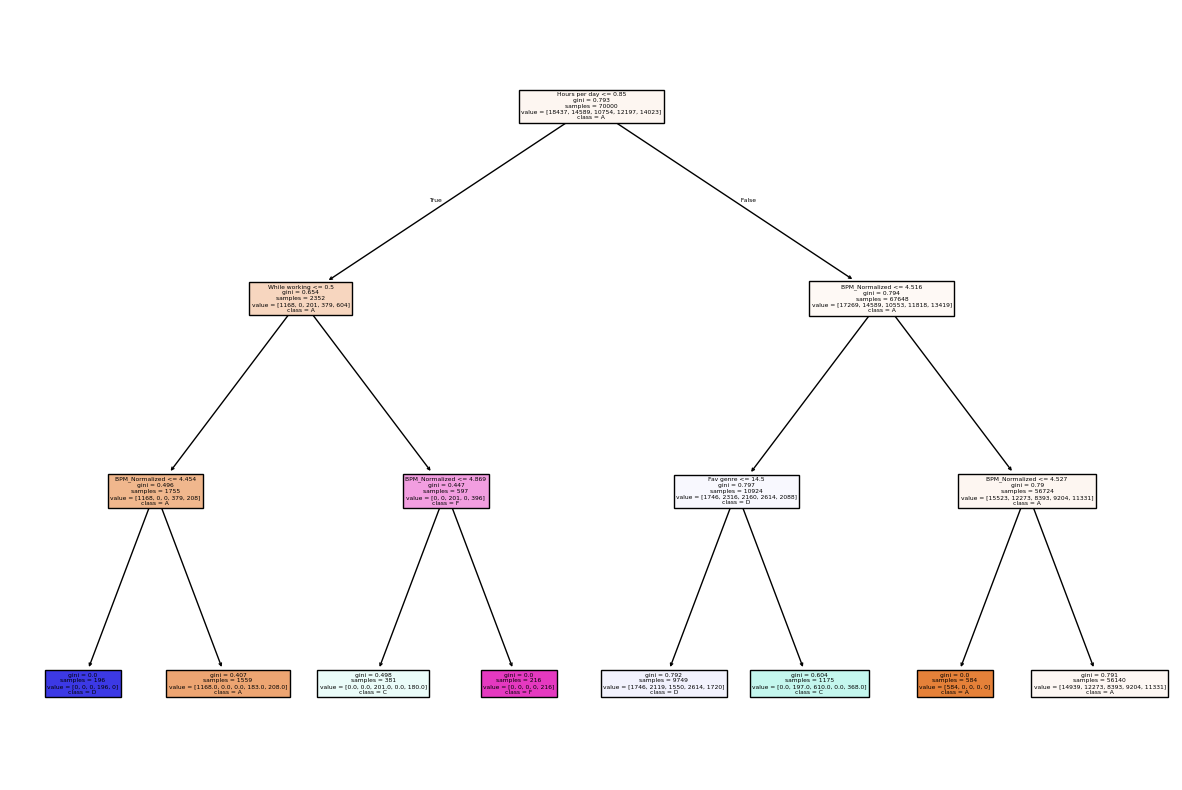

In [ ]:
# Decision tree - Grade_Letter vs music habits

# Convert 'while working' to numerical data
newSamples['While working'] = newSamples['While working'].map({'Yes': 1, 'No': 0})

# Create variables
y = newSamples['Grade_Letter']
x = newSamples[['Hours per day', 'While working',
       'Fav genre', 'Frequency [Classical]_Numeric',
       'Frequency [Country]_Numeric', 'Frequency [EDM]_Numeric', 'Frequency [Folk]_Numeric',
       'Frequency [Gospel]_Numeric', 'Frequency [Hip hop]_Numeric', 'Frequency [Jazz]_Numeric',
       'Frequency [K pop]_Numeric', 'Frequency [Latin]_Numeric', 'Frequency [Lofi]_Numeric',
       'Frequency [Metal]_Numeric', 'Frequency [Pop]_Numeric', 'Frequency [R&B]_Numeric',
       'Frequency [Rap]_Numeric', 'Frequency [Rock]_Numeric', 'Frequency [Video game music]_Numeric','BPM_Normalized']]

# Convert 'Fav genre' column to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Fav genre'] = le.fit_transform(x['Fav genre'])

# Genre mapping
genre_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("Genre Mapping (Numeric → Name):", genre_mapping)

# Training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Build tree
decisiontree1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decisiontree1.fit(x_train, y_train)

# Predict responses for test
y_pred_dt = decisiontree1.predict(x_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Plot the tree
plt.figure(figsize=(15, 10))
plot_tree(decisiontree1, filled=True, feature_names=x.columns, class_names=decisiontree1.classes_)
plt.show()

### Decision Tree 1 - Most Influential Attributes

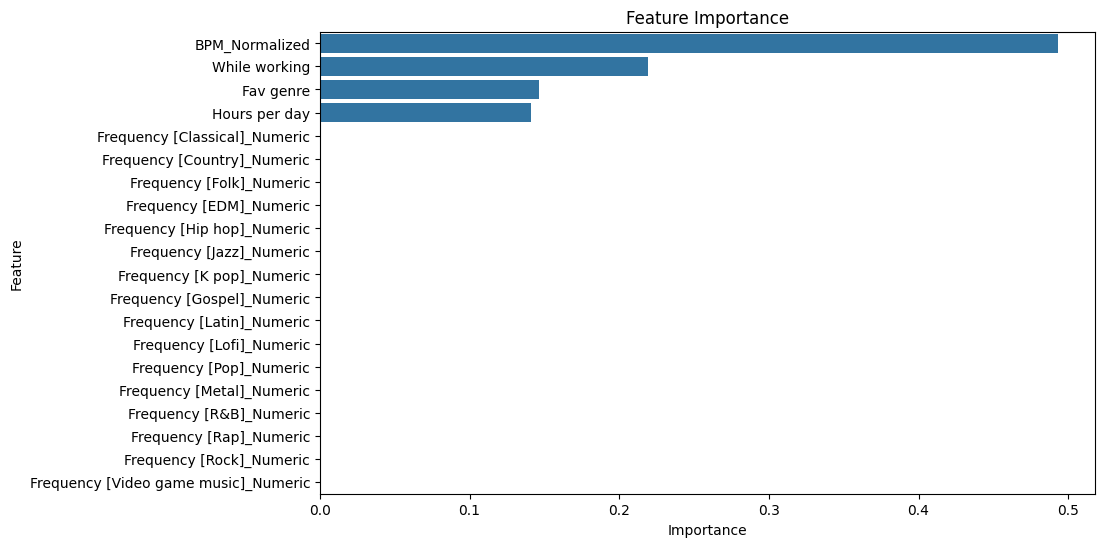

In [ ]:
# Most influential attributes for the first decision tree
feature_importances = decisiontree1.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# **Random Forest 1 For 1st Decision Tree: Letter Grade vs music habits**

In [ ]:
#random forest: Grade_Letter vs music habits
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(x_train, y_train)
y_pred_rf = forest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9492


### Feature Importance for Random Forest 1

In [ ]:
# Feature Importance of Random Forest 1
feature_importances = forest.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df

,Feature,Importance
0,Hours per day,0.242000
1,While working,0.018595
2,Fav genre,0.258534
3,Frequency [Classical]_Numeric,0.000000
4,Frequency [Country]_Numeric,0.000000
5,Frequency [EDM]_Numeric,0.000000
6,Frequency [Folk]_Numeric,0.000000
7,Frequency [Gospel]_Numeric,0.000000
8,Frequency [Hip hop]_Numeric,0.000000
9,Frequency [Jazz]_Numeric,0.000000


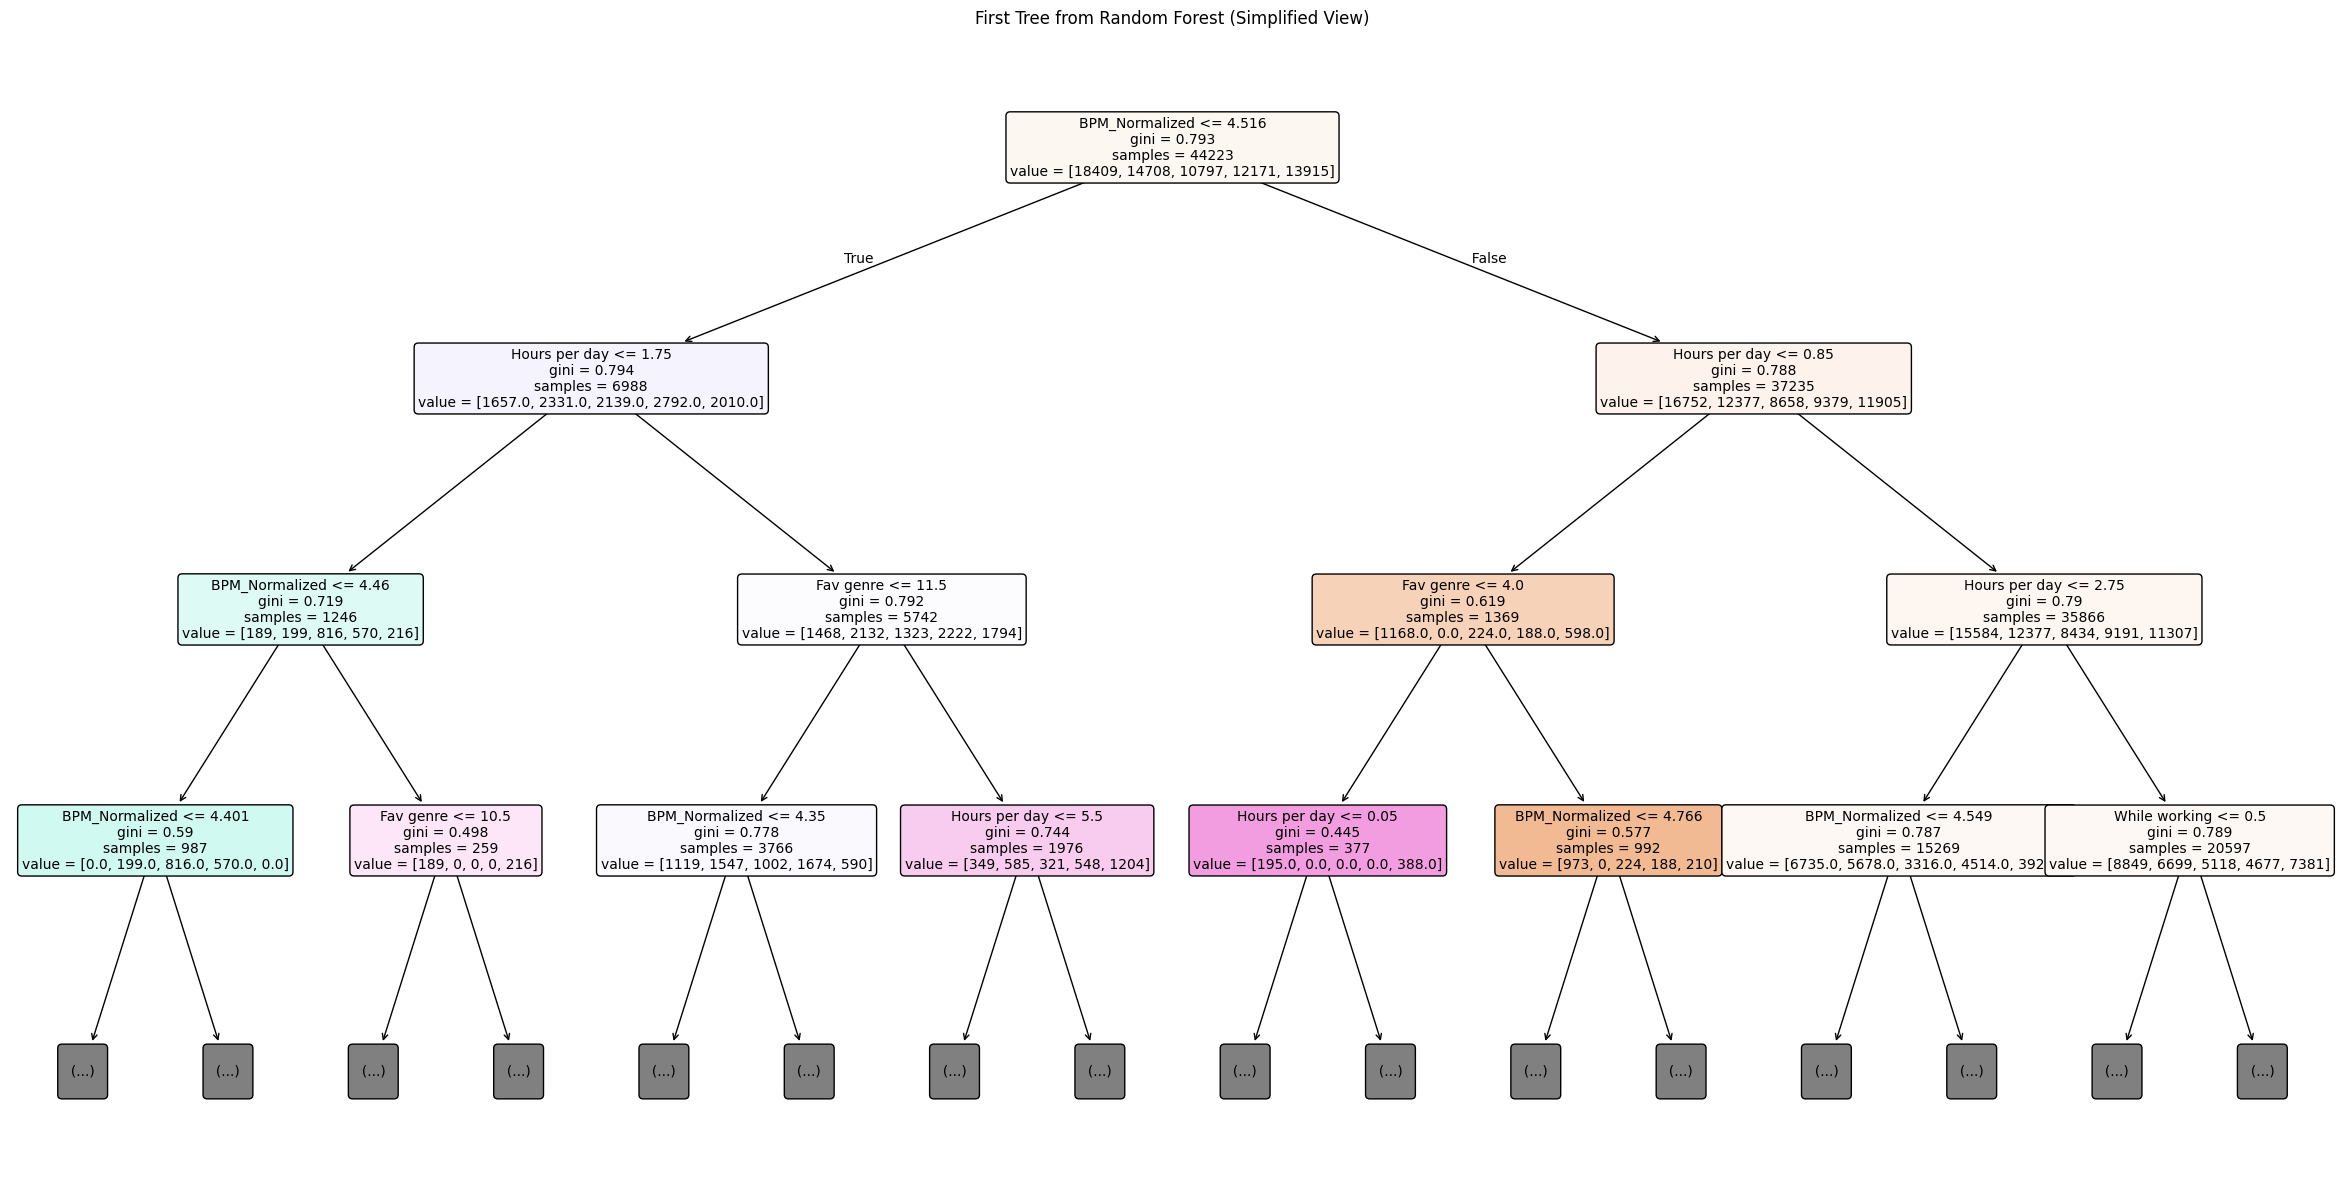


--- Interpretable Tree Rules ---
|--- BPM_Normalized <= 4.52
|   |--- Hours per day <= 1.75
|   |   |--- BPM_Normalized <= 4.46
|   |   |   |--- BPM_Normalized <= 4.40
|   |   |   |   |--- While working <= 0.50
|   |   |   |   |   |--- Fav genre: Rock or lower0
|   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |--- Fav genre >  14.50
|   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- While working >  0.50
|   |   |   |   |   |--- BPM_Normalized <= 4.37
|   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |--- BPM_Normalized >  4.37
|   |   |   |   |   |   |--- Fav genre <= 13.00
|   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |--- Fav genre >  13.00
|   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |--- BPM_Normalized >  4.40
|   |   |   |   |--- BPM_Normalized <= 4.43
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- BPM_Normalized >  4.43
|   |   |   |   |   |--- Fav genre <= 13.00
|   |   |   |   |   |   |--- class: 1.0
| 

In [ ]:
# FINDINGS for Final Report based on Decision Tree/ Random Forest 1
# Pick one tree from the forest and plot it
one_tree = forest.estimators_[0]
plt.figure(figsize=(30, 15), dpi=100)
plot_tree(
    one_tree,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title("First Tree from Random Forest (Simplified View)")
plt.show()

# Readable version of the tree with genre names
from sklearn.tree import export_text

tree_rules = export_text(one_tree, feature_names=list(x.columns))

# Replace genre encoding with actual genre names
for index, genre in genre_mapping.items():
    # We use (index + 0.5) because export_text prints thresholds like "Fav genre <= X.5"
    tree_rules = tree_rules.replace(f"Fav genre <= {index + 0.5}", f"Fav genre: {genre} or lower")

print("\n--- Interpretable Tree Rules ---")
print(tree_rules)

# **Decision Tree 2: Stress Levels vs Music Habits**

Genre Mapping (Numeric → Name): {np.int64(0): 'Classical', np.int64(1): 'Country', np.int64(2): 'EDM', np.int64(3): 'Folk', np.int64(4): 'Gospel', np.int64(5): 'Hip hop', np.int64(6): 'Jazz', np.int64(7): 'K pop', np.int64(8): 'Latin', np.int64(9): 'Lofi', np.int64(10): 'Metal', np.int64(11): 'Pop', np.int64(12): 'R&B', np.int64(13): 'Rap', np.int64(14): 'Rock', np.int64(15): 'Video game music'}


<ipython-input-45-1902338c3c2f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Fav genre'] = le.fit_transform(x['Fav genre'])


Accuracy: 0.2496


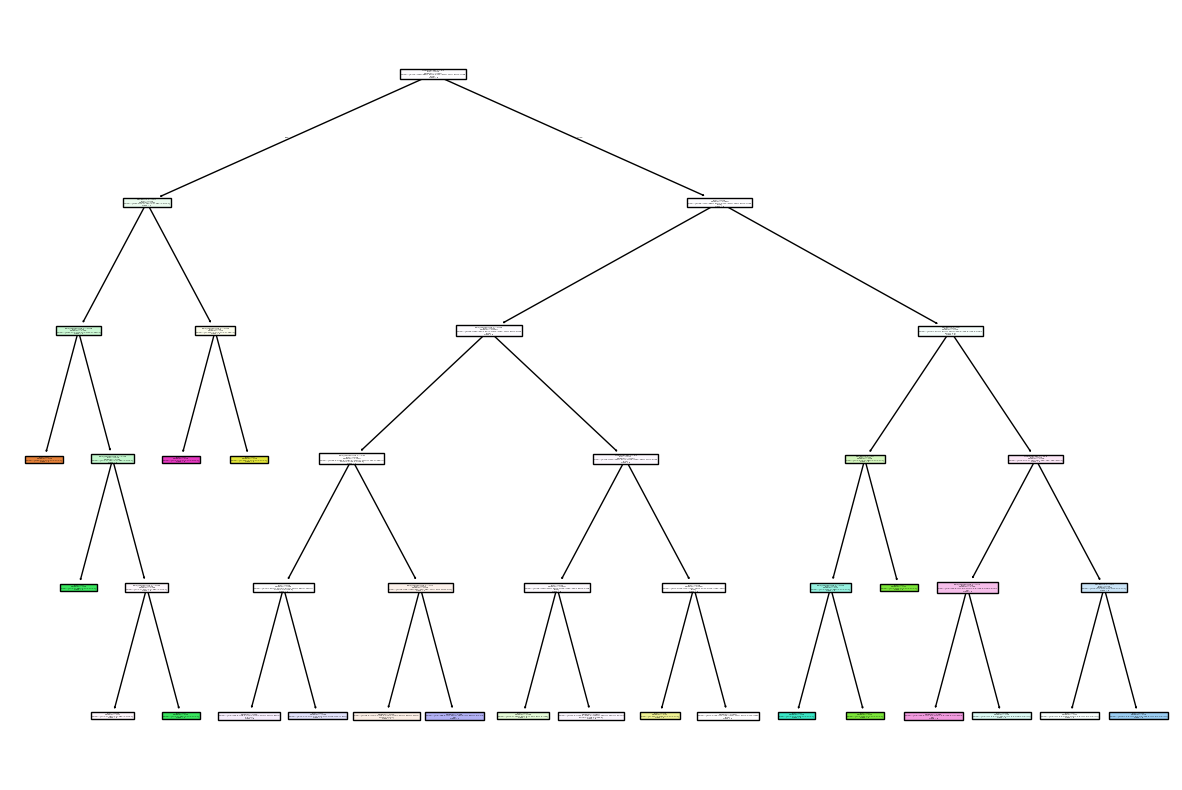

In [ ]:
#'while working' to numerical data
newSamples['While working'] = newSamples['While working'].map({'Yes': 1, 'No': 0})

#create variables
y = newSamples['Stress_Level (1-10)']
x = newSamples[['Hours per day', 'While working',
       'Fav genre', 'Frequency [Classical]_Numeric',
       'Frequency [Country]_Numeric', 'Frequency [EDM]_Numeric', 'Frequency [Folk]_Numeric',
       'Frequency [Gospel]_Numeric', 'Frequency [Hip hop]_Numeric', 'Frequency [Jazz]_Numeric',
       'Frequency [K pop]_Numeric', 'Frequency [Latin]_Numeric', 'Frequency [Lofi]_Numeric',
       'Frequency [Metal]_Numeric', 'Frequency [Pop]_Numeric', 'Frequency [R&B]_Numeric',
       'Frequency [Rap]_Numeric', 'Frequency [Rock]_Numeric', 'Frequency [Video game music]_Numeric','BPM_Normalized']]

# Convert 'Fav genre' column to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Fav genre'] = le.fit_transform(x['Fav genre'])

#genre mapping
genre_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("Genre Mapping (Numeric → Name):", genre_mapping)

#training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#build tree
decisiontree2 = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
decisiontree2.fit(x_train, y_train)

#predict responses for test
y_pred_dt = decisiontree2.predict(x_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

#plot the tree
plt.figure(figsize=(15, 10))
# Convert class names to strings before plotting
class_names_str = [str(i) for i in decisiontree2.classes_]
plot_tree(decisiontree2, filled=True, feature_names=x.columns, class_names=class_names_str) # Use string class names
plt.show()

### Feature Importance for Decision Tree 2

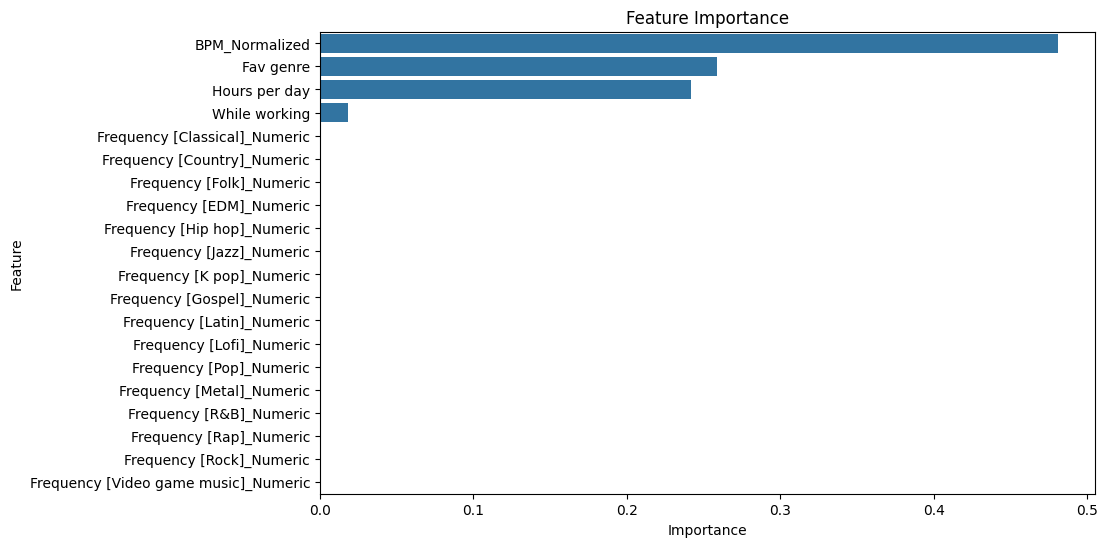

In [ ]:
# feature importance
feature_importances2 = decisiontree2.feature_importances_
feature_names2 = x.columns
feature_importance_df2 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df2 = feature_importance_df2.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df2)
plt.title('Feature Importance')
plt.show()

# **Random Forest 2: Stress levels vs Music Habits**

In [ ]:
forest2 = RandomForestClassifier(n_estimators=1000, random_state=42)
forest2.fit(x_train, y_train)
y_pred_rf = forest2.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.9101333333333333


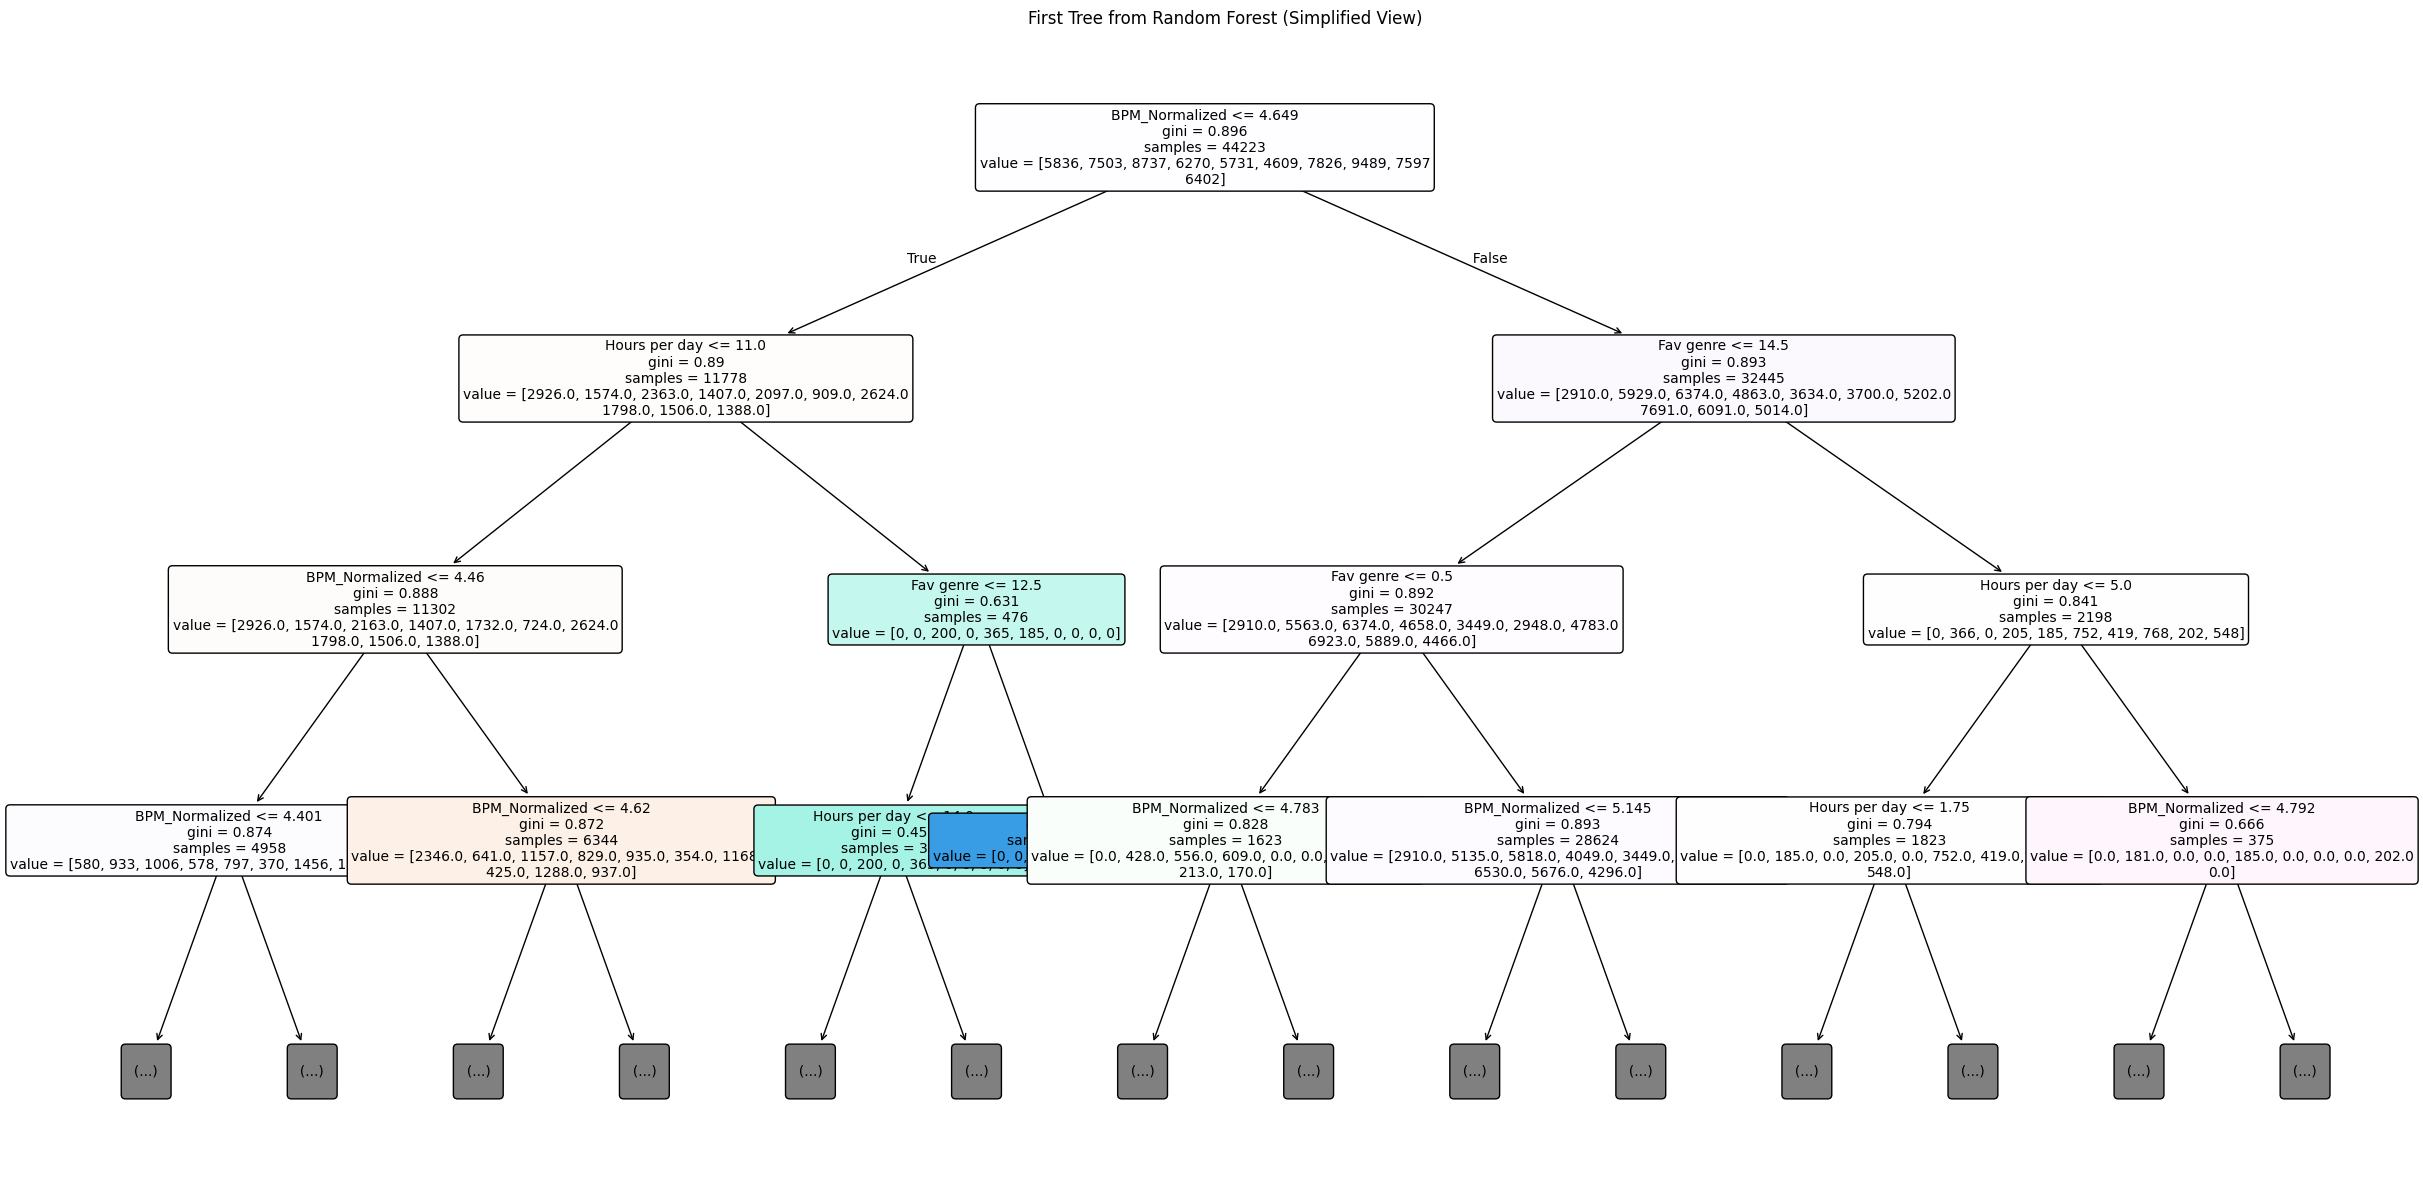


--- Interpretable Tree Rules ---
|--- BPM_Normalized <= 4.65
|   |--- Hours per day <= 11.00
|   |   |--- BPM_Normalized <= 4.46
|   |   |   |--- BPM_Normalized <= 4.40
|   |   |   |   |--- Fav genre: Folk or lower0
|   |   |   |   |   |--- BPM_Normalized <= 4.37
|   |   |   |   |   |   |--- Fav genre: Country or lower0
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Fav genre >  1.50
|   |   |   |   |   |   |   |--- Hours per day <= 6.50
|   |   |   |   |   |   |   |   |--- class: 7.0
|   |   |   |   |   |   |   |--- Hours per day >  6.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- BPM_Normalized >  4.37
|   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- Fav genre >  3.50
|   |   |   |   |   |--- BPM_Normalized <= 4.36
|   |   |   |   |   |   |--- Hours per day <= 3.50
|   |   |   |   |   |   |   |--- Hours per day <= 1.00
|   |   |   |   |   |   |   |   |--- class: 8.0
|   |   |   |   |   |   |   |--- Hours per day >  1

In [ ]:
#FINDINGS
# Pick one tree from the forest and plot it
one_tree = forest2.estimators_[0]
plt.figure(figsize=(30, 15), dpi=100)
plot_tree(
    one_tree,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title("First Tree from Random Forest (Simplified View)")
plt.show()

# Print readable version of the tree with genre names
from sklearn.tree import export_text

tree_rules = export_text(one_tree, feature_names=list(x.columns))

# Replace genre encoding with actual genre names
for index, genre in genre_mapping.items():
    # We use (index + 0.5) because export_text prints thresholds like "Fav genre <= X.5"
    tree_rules = tree_rules.replace(f"Fav genre <= {index + 0.5}", f"Fav genre: {genre} or lower")

print("\n--- Interpretable Tree Rules ---")
print(tree_rules)

### Feature Importance for Random Forest 2

In [ ]:
#feature importance
feature_importances = forest2.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df


,Feature,Importance
0,Hours per day,0.253218
1,While working,0.000000
2,Fav genre,0.265466
3,Frequency [Classical]_Numeric,0.000000
4,Frequency [Country]_Numeric,0.000000
5,Frequency [EDM]_Numeric,0.000000
6,Frequency [Folk]_Numeric,0.000000
7,Frequency [Gospel]_Numeric,0.000000
8,Frequency [Hip hop]_Numeric,0.000000
9,Frequency [Jazz]_Numeric,0.000000


# **Random Forest 3: STEM vs. Business (Grade Letter vs Music Habits)**

In [ ]:
# Random Forest: STEM vs. Business Majors (letter grade vs. music habits)


# Filter data for STEM majors
stem_majors = newSamples[newSamples['Department'].isin(['Mathematics', 'CS', 'Engineering'])]


# Filter data for Business majors
business_majors = newSamples[newSamples['Department'] == 'Business']


# Create a new column 'Major_Type' to indicate STEM or Business
newSamples['Department'] = np.where(newSamples['Department'].isin(['Mathematics', 'CS', 'Engineering']), 'STEM', 'Business')


# Define features (x) and target (y)
y = newSamples['Grade_Letter']  # Target variable: Grade Letter
x = newSamples[['Department', 'Hours per day', 'While working', 'Fav genre',
               'Frequency [Classical]_Numeric', 'Frequency [Country]_Numeric',
               'Frequency [EDM]_Numeric', 'Frequency [Folk]_Numeric',
               'Frequency [Gospel]_Numeric', 'Frequency [Hip hop]_Numeric',
               'Frequency [Jazz]_Numeric', 'Frequency [K pop]_Numeric',
               'Frequency [Latin]_Numeric', 'Frequency [Lofi]_Numeric',
               'Frequency [Metal]_Numeric', 'Frequency [Pop]_Numeric',
               'Frequency [R&B]_Numeric', 'Frequency [Rap]_Numeric',
               'Frequency [Rock]_Numeric', 'Frequency [Video game music]_Numeric',
               'BPM_Normalized']]


# Convert categorical features to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Department', 'Fav genre']:
    x.loc[:, col] = le.fit_transform(x[col])


# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# Create and train the Random Forest model
random_forest3 = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest3.fit(x_train, y_train)


# Make predictions using the Random Forest model
y_pred_rf = random_forest3.predict(x_test)


# Print accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)


Accuracy: 0.9503


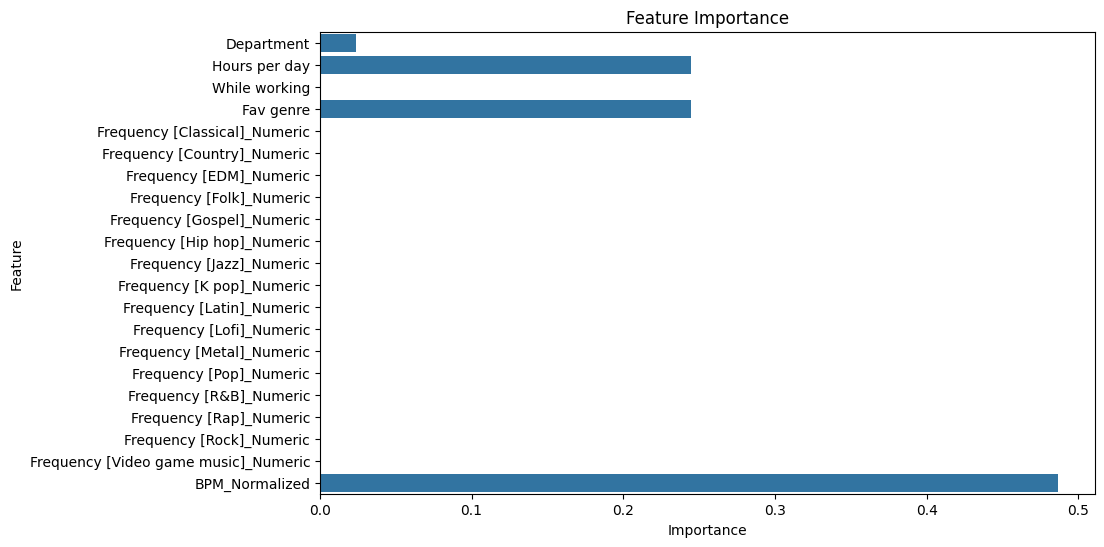

In [ ]:
# Feature importance for random forest 3
feature_importances = random_forest3.feature_importances_
feature_names = x.columns
feature_importance_3 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_3)
plt.title('Feature Importance')
plt.show()

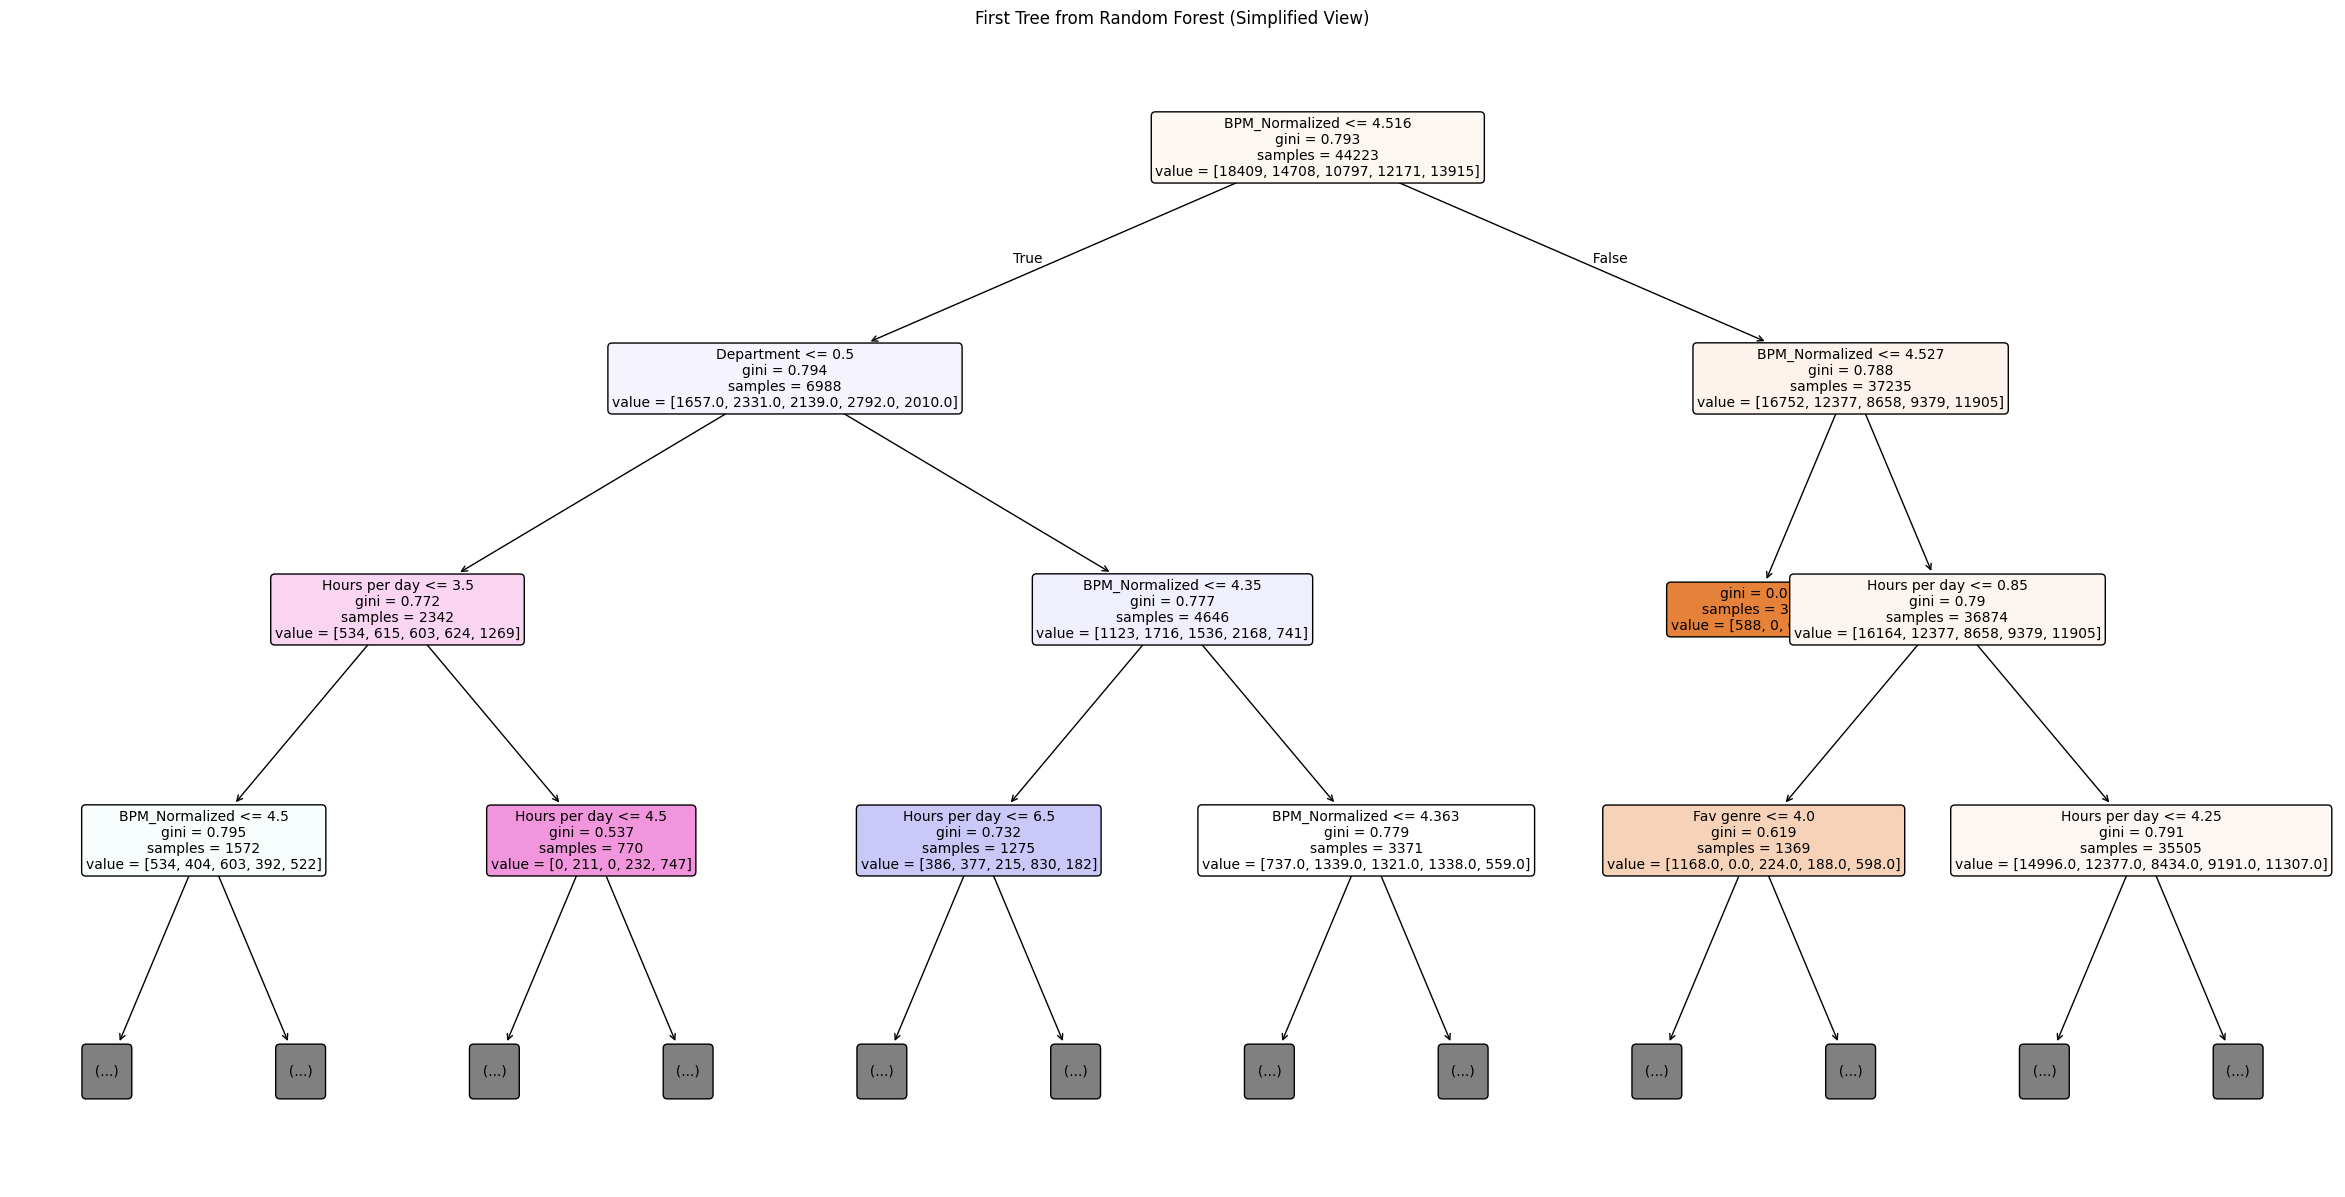


--- Interpretable Tree Rules ---
|--- BPM_Normalized <= 4.52
|   |--- Department <= 0.50
|   |   |--- Hours per day <= 3.50
|   |   |   |--- BPM_Normalized <= 4.50
|   |   |   |   |--- BPM_Normalized <= 4.38
|   |   |   |   |   |--- BPM_Normalized <= 4.35
|   |   |   |   |   |   |--- Fav genre: Rock or lower0
|   |   |   |   |   |   |   |--- Fav genre <= 7.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Fav genre >  7.00
|   |   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |--- Fav genre >  14.50
|   |   |   |   |   |   |   |--- Hours per day <= 2.25
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- Hours per day >  2.25
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- BPM_Normalized >  4.35
|   |   |   |   |   |   |--- Fav genre: Latin or lower0
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Fav genre >  8.50
|   |   |   |   |   |   |   |--- Fav genr

In [ ]:
three_tree = random_forest3.estimators_[0]
plt.figure(figsize=(30, 15), dpi=100)
plot_tree(
    three_tree,
    feature_names=x.columns,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=3
)
plt.title("First Tree from Random Forest (Simplified View)")
plt.show()

# Readable version of the tree with genre names
from sklearn.tree import export_text

tree_rules = export_text(three_tree, feature_names=list(x.columns))

# Since 'Department' is encoded, we should replace it in the rules
major_type_mapping = {0: 'Business', 1: 'STEM'}

for index, genre in genre_mapping.items():
    # We use (index + 0.5) because export_text prints thresholds like "Fav genre <= X.5"
    tree_rules = tree_rules.replace(f"Fav genre <= {index + 0.5}", f"Fav genre: {genre} or lower")

for index, major_type in major_type_mapping.items():
    tree_rules = tree_rules.replace(f"Major_Type <= {index + 0.5}", f"Major_Type: {major_type} or lower")

print("\n--- Interpretable Tree Rules ---")
print(tree_rules)

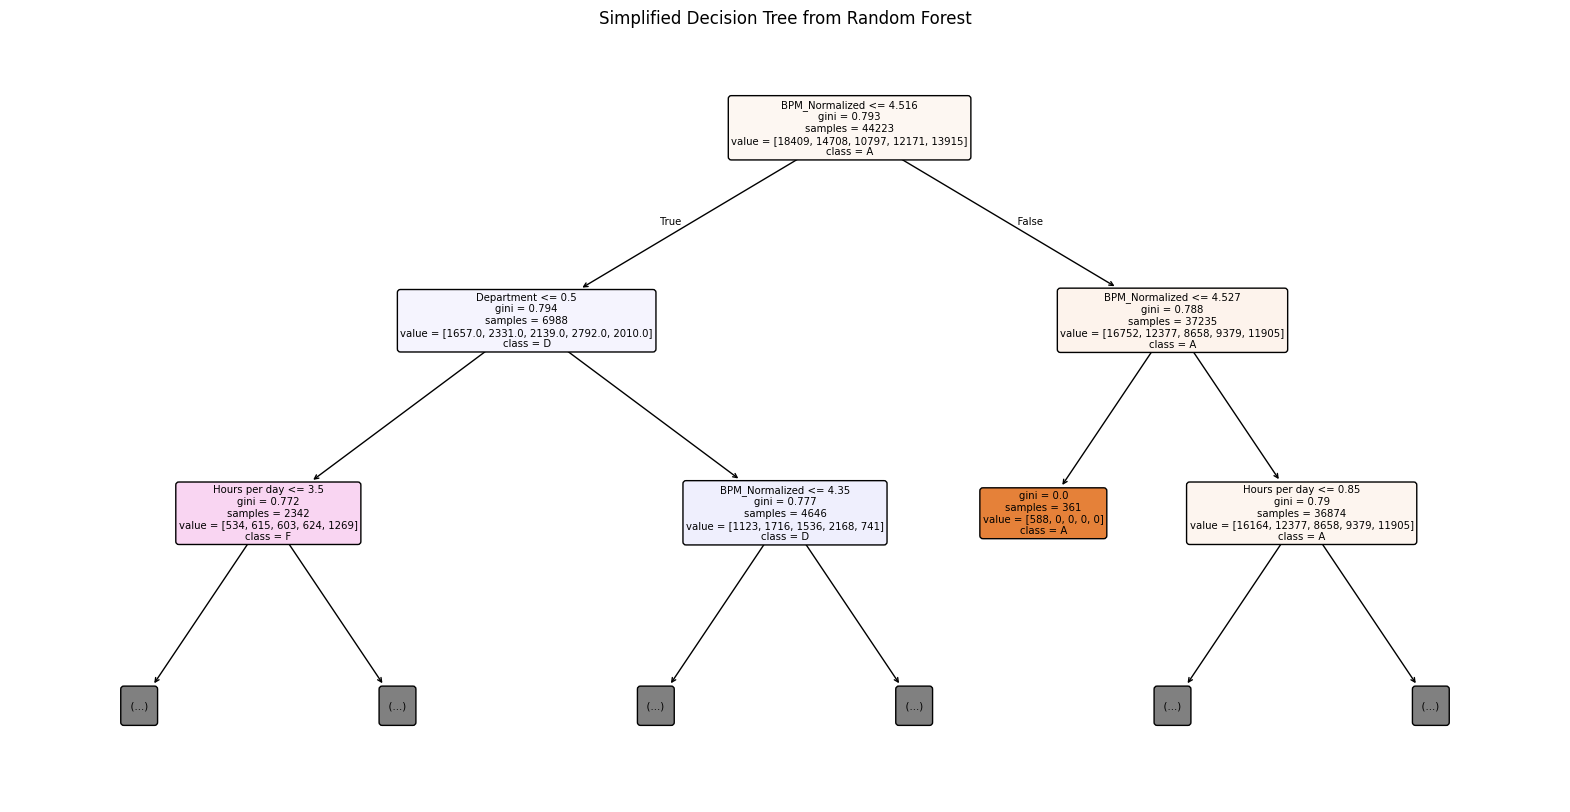

In [ ]:
# Extract a single tree from the random forest #3
one_tree = random_forest3.estimators_[0]

# Plot the simplified tree
plt.figure(figsize=(20, 10))
plot_tree(one_tree,
          feature_names=x.columns,
          class_names=sorted(y.unique()),
          filled=True,
          rounded=True,
          max_depth=2)
plt.title("Simplified Decision Tree from Random Forest")
plt.show()
